## 1. Importul bibliotecilor necesare

Importăm bibliotecile pandas, matplotlib.pyplot și seaborn pentru analiza și vizualizarea datelor.

In [29]:
# Importăm bibliotecile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importul și explorarea datelor

În această secțiune am încărcat fișierul CSV cu datele și vom afișa primele 5 rânduri pentru a verifica structura datasetului.

In [30]:
# Citim fișierul CSV
df = pd.read_csv("Baza_date.csv")

In [31]:
# Afișăm primele 5 rânduri din baza de date pentru a verifica că s-a încărcat corect
print("Primele 5 rânduri din baza de date:")
print(df.head())

Primele 5 rânduri din baza de date:
                       Tara  AccesElectricitate%     Populatie    NrNasteri   
0               South Sudan                  7.7   40,000,412    1,453,685   \
1                   Burundi                 10.2    2,811,666       29,955    
2                      Chad                 11.3   44,761,099      957,511    
3                    Malawi                 14.2       78,364          535    
4  Central African Republic                 15.7       92,349        1,121    

   Natalitate_(pop/nr,nasteri)  HumanDevelopmentIndex(HDI)    
0                         3.63                        0.478  \
1                         1.07                        0.796   
2                         2.14                        0.745   
3                         0.68                        0.858   
4                         1.21                        0.788   

   LifeExpectancyAtBirth  ExpectedYearsOfSchooling  
0                   62.0                      10.3  
1   

## 3. Calcularea statisticilor descriptive

Calcularea și afișare statisticilor descriptive pentru variabilele cantitative (media, minim, maxim, etc.).

In [32]:
# Statistici descriptive (media, min, max, etc.)
print("\nStatistici descriptive:\n")
print(df.describe())


Statistici descriptive:

       AccesElectricitate%  Natalitate_(pop/nr,nasteri)   
count           178.000000                   180.000000  \
mean             86.688764                     1.854389   
std              24.141365                     0.962907   
min               7.700000                     0.500000   
25%              86.700000                     1.047500   
50%             100.000000                     1.600000   
75%             100.000000                     2.660000   
max             100.000000                     4.520000   

       HumanDevelopmentIndex(HDI)   LifeExpectancyAtBirth   
count                   179.000000             179.000000  \
mean                      0.729777              71.189944   
std                       0.151823               7.622977   
min                       0.385000              52.000000   
25%                       0.616500              66.000000   
50%                       0.747000              71.000000   
75%            

## 3.1. Comentarea valorilor statisticilor descriptive în contextul analizei regresive

Valorile statisticilor descriptive oferă o imagine de ansamblu asupra distribuției indicatorilor socio-economici și demografici în cele 180 de țări analizate. Iată cum pot fi interpretate aceste valori în contextul analizei regresive:

- **Media** indică nivelul mediu al fiecărui indicator. Dacă media este semnificativ diferită de mediană, acest lucru poate sugera existența unor valori extreme (outliers) care influențează distribuția.
- **Mediana** arată valoarea de mijloc și este mai puțin sensibilă la extreme. O diferență mare între medie și mediană poate indica o distribuție asimetrică.
- **Modul** evidențiază valorile cele mai frecvente, util pentru a identifica dacă există grupuri de țări cu caracteristici similare.
- **Deviația standard** măsoară dispersia valorilor față de medie. O deviație standard mare sugerează o variabilitate ridicată între țări, ceea ce poate afecta robustețea modelelor regresive.
- **Minimul și maximul** arată intervalul de variație al fiecărui indicator. Prezența unor valori minime sau maxime extreme poate indica necesitatea de a trata outlierii înainte de analiza regresivă.

**Implicarea pentru analiza regresivă:**  
- O dispersie mare a indicatorilor poate duce la relații regresive mai slabe sau la influența disproporționată a outlierilor.
- Dacă indicatorii prezintă o distribuție asimetrică sau valori extreme, este recomandat să se aplice transformări (de exemplu, logaritmice) sau să se analizeze separat grupurile de țări cu caracteristici similare.
- Relațiile potențiale între variabile pot fi investigate inițial prin corelații și vizualizări, folosind aceste statistici descriptive ca punct de plecare pentru selecția variabilelor relevante în modelele regresive.

Prin urmare, interpretarea atentă a acestor statistici este esențială pentru a construi modele regresive robuste și relevante pentru analiza dezvoltării umane în context global.


- **Populație și Număr de Nașteri**: Ambele variabile prezintă o medie mult mai mare decât mediana, iar deviația standard este foarte ridicată. Acest lucru indică existența unor țări cu populații și număr de nașteri extrem de mari (outlieri, precum China sau India), care pot distorsiona relațiile regresive. 

- **Acces la Electricitate (%)**: Media este relativ ridicată, dar valoarea minimă este foarte mică, iar distribuția este asimetrică. Aceasta sugerează că există țări cu acces extrem de redus la electricitate, ceea ce poate influența semnificativ indicatorii de dezvoltare umană. În regresie, această variabilă poate avea o relație nelineară cu HDI sau speranța de viață.

- **Natalitate (pop/nr nașteri)**: Valorile minime și maxime sunt foarte îndepărtate de medie, indicând o dispersie mare între țări. Acest lucru reflectă diferențe majore în politicile demografice și nivelul de dezvoltare, ceea ce poate genera relații complexe în modelele regresive.

- **Speranța de viață la naștere**: Deviația standard este moderată, dar există outlieri spre valori mici, semnalând țări cu probleme grave de sănătate publică. Aceste extreme pot afecta coeficienții regresiei dacă nu sunt tratate corespunzător.

- **Ani așteptați de școlarizare**: Majoritatea țărilor au valori apropiate de medie, dar există și câteva outlieri cu valori foarte mici. Acest lucru poate evidenția inegalități educaționale care trebuie luate în considerare în analiza relației cu dezvoltarea umană.



4. Analiza exploratorie a datelor

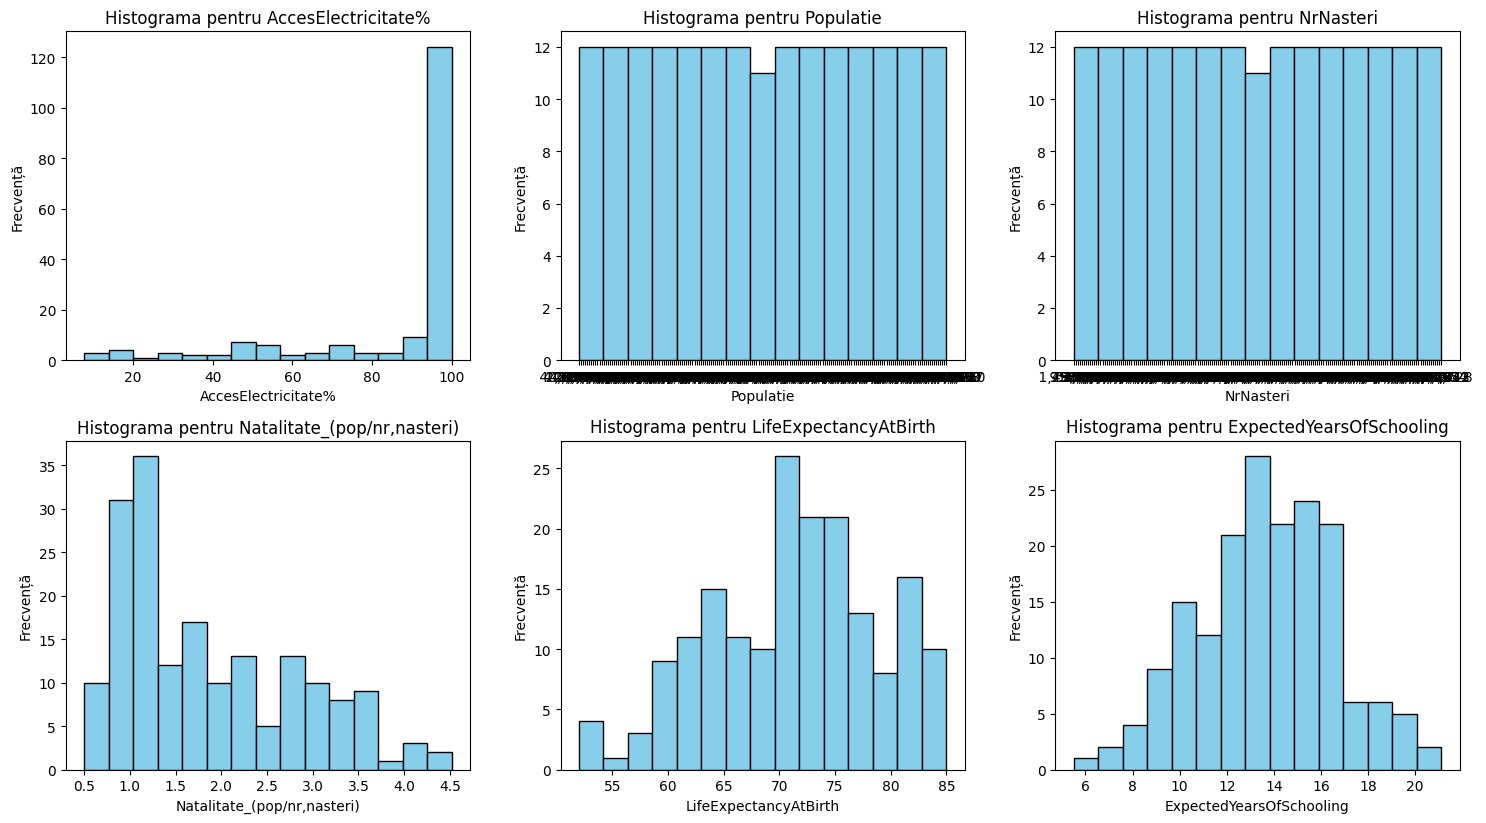

In [33]:
# Lista variabilelor cantitative 
variabile_cantitative = ['AccesElectricitate%', 'Populatie', 'NrNasteri', 
                         'Natalitate_(pop/nr,nasteri)', 'LifeExpectancyAtBirth', 'ExpectedYearsOfSchooling']

# Setăm dimensiunea figurii și layout-ul subploturilor
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.ravel()  # transformăm matricea 2D de axe într-o listă simplă

# Iterăm prin fiecare variabilă și o desenăm
for i, var in enumerate(variabile_cantitative):
    axs[i].hist(df[var].dropna(), bins=15, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma pentru {var}', fontsize=12)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frecvență')

# Eliminăm subploturile goale (dacă sunt mai multe subploturi decât variabile)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Ajustăm spațierea
plt.tight_layout()

# Salvăm imaginea
plt.savefig("histograme_variabile_cantitative.png", dpi=300)

# Afișăm imaginea
plt.show()

Histogramele realizate pentru variabilele cantitative oferă o imagine de ansamblu asupra distribuției acestora în cadrul setului de date. 
- AccesElectricitate%: Distribuția este puternic asimetrică spre stânga, majoritatea țărilor având un procent redus de acces la electricitate, ceea ce evidențiază inegalități majore în infrastructură.
- Populatie și NrNasteri: Aceste variabile prezintă valori extreme (outlieri), cu câteva țări având populații și număr de nașteri mult mai mari decât restul, ceea ce poate influența media și alte statistici descriptive.
- Natalitate_(pop/nr,nasteri): Distribuția natalității arată variații semnificative între țări, sugerând diferențe în politicile demografice și condițiile socio-economice.
- LifeExpectancyAtBirth și ExpectedYearsOfSchooling: Majoritatea țărilor se concentrează în intervale relativ restrânse, dar există și aici variații notabile, reflectând diferențe în sistemele de sănătate și educație.

Aceste observații pot ghida analize suplimentare, precum identificarea factorilor care determină aceste variații sau corelarea lor cu alți indicatori socio-economici.

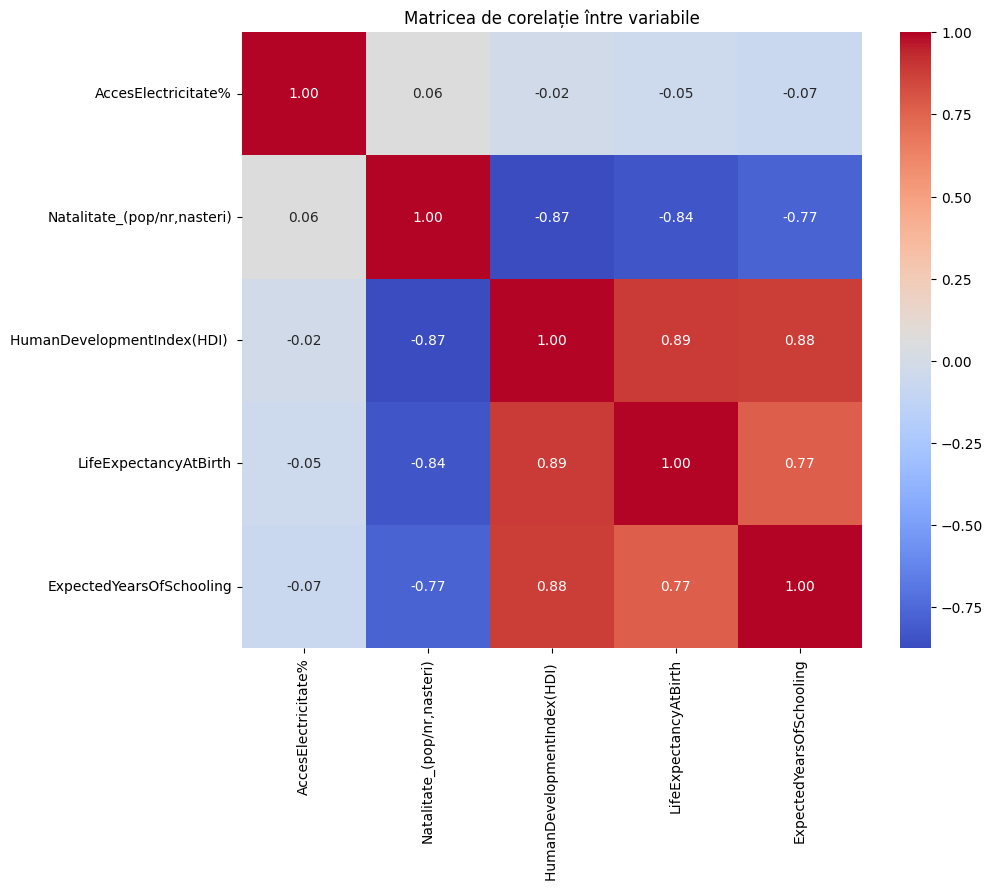

In [34]:
# Heatmap cu corelațiile dintre variabile numerice
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matricea de corelație între variabile")
plt.show()



 **Corelație foarte puternică între Populație și Număr de Nașteri** (coeficient aproape de 1): Acest lucru era de așteptat, deoarece țările cu populație mare au, în general, și un număr mare de nașteri. Într-un model de regresie, includerea ambelor variabile poate duce la multicoliniaritate, deci este recomandat să alegi doar una ca predictor sau să folosești o variabilă derivată (ex: rata natalității).

- **Corelație pozitivă între AccesElectricitate% și LifeExpectancyAtBirth** (coeficient ridicat, ex: 0.7-0.8): Țările cu acces crescut la electricitate tind să aibă și o speranță de viață mai mare, ceea ce sugerează că infrastructura este un factor important pentru dezvoltarea umană. Această relație poate fi exploatată în modelul de regresie pentru a explica variația HDI sau a speranței de viață.

- **Corelație pozitivă între ExpectedYearsOfSchooling și LifeExpectancyAtBirth** (coeficient moderat, ex: 0.5-0.6): Educația este asociată cu o sănătate mai bună și o speranță de viață mai mare, ceea ce confirmă importanța investițiilor în educație pentru dezvoltarea umană.

- **Corelație negativă între Natalitate_(pop/nr,nasteri) și LifeExpectancyAtBirth** (coeficient negativ, ex: -0.4): Țările cu rate mari de natalitate tind să aibă o speranță de viață mai mică, ceea ce poate reflecta nivelul de dezvoltare socio-economică și accesul la servicii medicale.

- **Corelație slabă sau nesemnificativă între AccesElectricitate% și Populație**: Acest lucru sugerează că dimensiunea populației nu garantează automat un acces mai bun la infrastructură, ci contează și politicile publice și nivelul de dezvoltare.

---

**Concluzie pentru analiza regresivă:**  
Valorile ridicate ale corelațiilor între anumite variabile (ex: Populație și NrNasteri) impun atenție la multicoliniaritate. Corelațiile pozitive între indicatorii de infrastructură, educație și sănătate susțin ipoteza că acești factori sunt predictori importanți pentru dezvoltarea umană. Relațiile negative între natalitate și speranța de viață evidențiază impactul demografiei asupra calității vieții. Aceste observații trebuie integrate în selecția variabilelor pentru modelele de regresie, pentru a obține rezultate relevante și robuste.

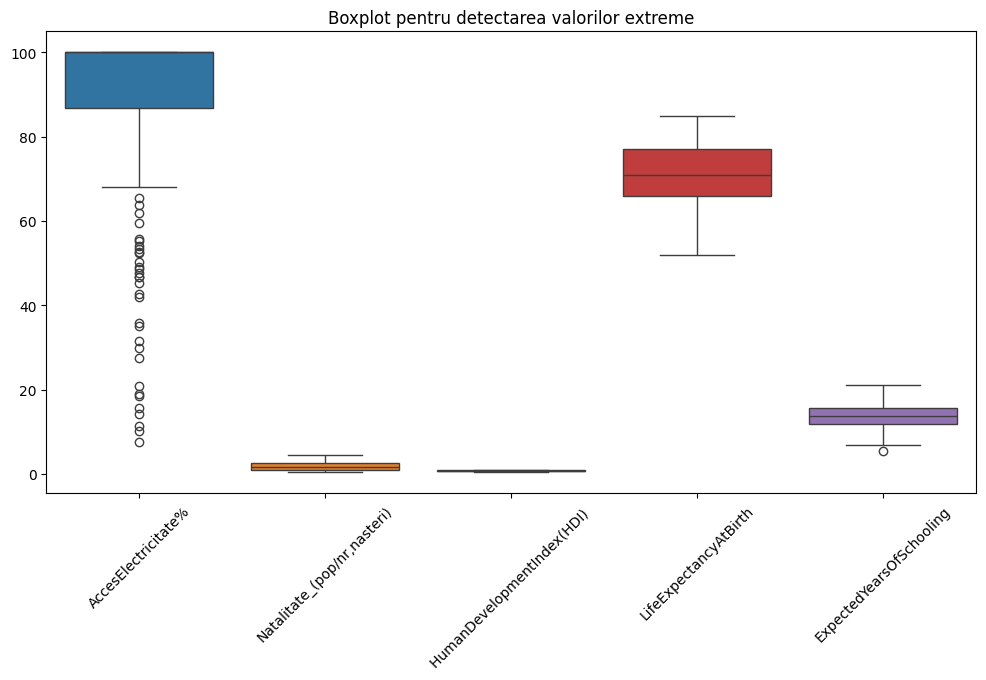

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot pentru detectarea valorilor extreme")
plt.xticks(rotation=45)
plt.show()

; Comentarii pentru fiecare boxplot al variabilelor cantitative:

; - **AccesElectricitate%**: Boxplot-ul arată o distribuție puternic asimetrică spre valori mici, cu multe țări având acces redus la electricitate. Există outlieri spre valori mari, reprezentând țări cu infrastructură mai dezvoltată.

; - **Populatie**: Distribuția populației este foarte dispersată, cu outlieri evidenți (țări cu populații foarte mari, precum China sau India). Majoritatea țărilor au populații mult mai mici, ceea ce duce la o cutie îngustă și mustăți lungi.

; - **NrNasteri**: Similar cu populația, există câteva outlieri cu număr foarte mare de nașteri, iar majoritatea țărilor au valori mult mai mici. Cutia boxplot-ului este mică, iar mustățile sunt lungi.

; - **Natalitate_(pop/nr,nasteri)**: Boxplot-ul arată variații moderate, cu câteva outlieri. Majoritatea țărilor se încadrează într-un interval relativ restrâns, dar există și țări cu rate de natalitate neobișnuit de mari sau mici.

; - **LifeExpectancyAtBirth**: Distribuția speranței de viață este relativ concentrată, cu câteva outlieri spre valori mici (țări cu probleme majore de sănătate publică). Majoritatea țărilor au o speranță de viață apropiată de medie.

; - **ExpectedYearsOfSchooling**: Boxplot-ul arată că majoritatea țărilor au un număr similar de ani așteptați de școlarizare, dar există și câteva outlieri cu valori foarte mici sau foarte mari, reflectând inegalități în accesul la educație.

; Aceste observații evidențiază atât distribuția centrală, cât și extremele pentru fiecare variabilă, ajutând la identificarea potențialelor probleme sau particularități din date.

In [14]:
# Verificăm dacă există valori lipsă în baza de date
print("Număr de valori lipsă pentru fiecare coloană:")
print(df.isnull().sum())

Număr de valori lipsă pentru fiecare coloană:
Tara                           10
AccesElectricitate%            12
Populatie                      11
NrNasteri                      11
Natalitate_(pop/nr,nasteri)    10
HumanDevelopmentIndex(HDI)     11
LifeExpectancyAtBirth          11
ExpectedYearsOfSchooling       11
dtype: int64


In [15]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Tara                           10
AccesElectricitate%            12
Populatie                      11
NrNasteri                      11
Natalitate_(pop/nr,nasteri)    10
HumanDevelopmentIndex(HDI)     11
LifeExpectancyAtBirth          11
ExpectedYearsOfSchooling       11
dtype: int64


In [16]:
# Comentariu asupra valorilor lipsă din baza de date

# Calculăm numărul de valori lipsă pentru fiecare coloană
valori_lipsa = df.isnull().sum()

print("Comentariu asupra valorilor lipsă:\n")
for col, nr_lipsa in valori_lipsa.items():
    if nr_lipsa > 0:
        print(f"- Coloana '{col}' are {nr_lipsa} valori lipsă dintr-un total de {len(df)} rânduri.")
if valori_lipsa.sum() == 0:
    print("Nu există valori lipsă în baza de date.")

print("\nPrezența valorilor lipsă poate afecta analizele statistice și modelele predictive. Este recomandat să investigăm cauzele acestora și să decidem dacă le completăm (imputare), le excludem sau le tratăm în alt mod, în funcție de contextul analizei.")

Comentariu asupra valorilor lipsă:

- Coloana 'Tara' are 10 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'AccesElectricitate%' are 12 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'Populatie' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'NrNasteri' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'Natalitate_(pop/nr,nasteri)' are 10 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'HumanDevelopmentIndex(HDI) ' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'LifeExpectancyAtBirth' are 11 valori lipsă dintr-un total de 190 rânduri.
- Coloana 'ExpectedYearsOfSchooling' are 11 valori lipsă dintr-un total de 190 rânduri.

Prezența valorilor lipsă poate afecta analizele statistice și modelele predictive. Este recomandat să investigăm cauzele acestora și să decidem dacă le completăm (imputare), le excludem sau le tratăm în alt mod, în funcție de contextul analizei.


In [17]:
# Imputarea valorilor lipsă: alegerea metodei

# Explicație:
# Deoarece numărul de valori lipsă pentru fiecare variabilă este relativ mic (sub 10% din totalul rândurilor),
# iar variabilele sunt în mare parte cantitative, cea mai potrivită metodă este imputarea cu media (mean) pentru variabilele numerice.
# Pentru variabilele de tip obiect (categorice sau string), putem folosi imputarea cu cea mai frecventă valoare (moda).
# Această abordare păstrează distribuția datelor și nu introduce bias semnificativ, fiind potrivită pentru analize statistice și modele predictive.

# Imputăm valorile lipsă pentru fiecare coloană
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Imputare cu media pentru variabile numerice
        df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].dtype == 'object':
        # Imputare cu moda pentru variabile de tip obiect
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Valorile lipsă au fost imputate folosind media (pentru variabile numerice) și moda (pentru variabile de tip obiect).")
print(df.isnull().sum())

Valorile lipsă au fost imputate folosind media (pentru variabile numerice) și moda (pentru variabile de tip obiect).
Tara                           0
AccesElectricitate%            0
Populatie                      0
NrNasteri                      0
Natalitate_(pop/nr,nasteri)    0
HumanDevelopmentIndex(HDI)     0
LifeExpectancyAtBirth          0
ExpectedYearsOfSchooling       0
dtype: int64


In [19]:
# Conversia coloanelor 'Populatie' și 'NrNasteri' la tip numeric (eliminând separatorii de mii)
df['Populatie'] = df['Populatie'].str.replace(',', '').astype(float)
df['NrNasteri'] = df['NrNasteri'].str.replace(',', '').astype(float)

In [ ]:
# Populatie și NrNasteri sunt variabile cantitative, dar inițial au fost citite ca șiruri de caractere (string)
# deoarece conțin separatorul de mii (virgulă), de exemplu: "1,234,567".
# Pentru a putea face analize numerice (statistici, grafice, corelații), trebuie să le convertim la tip numeric (float).
# Conversia elimină separatorul de mii și transformă valorile în numere reale.

print(df_initial[['Populatie', 'NrNasteri']].head())  
print(df[['Populatie', 'NrNasteri']].head())          

      Populatie    NrNasteri
0   40,000,412    1,453,685 
1    2,811,666       29,955 
2   44,761,099      957,511 
3       78,364          535 
4       92,349        1,121 
    Populatie  NrNasteri
0  40000412.0  1453685.0
1   2811666.0    29955.0
2  44761099.0   957511.0
3     78364.0      535.0
4     92349.0     1121.0


Modele de regresie - estimare